# Week 5: Task 11-12
#### Name: Kai Ferragallo-Hawkins
#### Date: 13.2.2023

##Setup

I spent a few hours trying to understand the samplics package to do systematic sampling. What I've determined is that, while the package is interesting - especially for more weighted sampling methods - the tasks assigned here are a bit to simplistic to benefit from using samplics. Therefore, I decided to make my own function for systematic sampling in Pandas, which can be seen below.



In [41]:
import pandas as pd
import numpy as np
import samplics as smp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import SurveySamplingFunctions as ssf

### Functions
def systematic_sampling(df, step):
    """Preforms basic systematic sampling on a python dataset, utilizing a dataframe and step value. Indexes the values with numpy.arrange, which takes evenly spaced values in an interval, and then locates those relevant indexes into a new dataframe."""
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

def system_var (main, sample, sample_key, Is_Sqrt = False):
    """"Calculates the system variance by manually calculating the information for design variance based on population sizes, given two pandas dataframes of the original information and the sample. Population variance calculated through Pandas var."""
    sqr = 0.5 if Is_Sqrt else 1
    s_var = ((len(main)**2)*(1-len(sample)/len(main))*(1/len(sample))*sample[sample_key].var(ddof=1))**sqr
    return s_var

### Province 91
## Importing Province91 Data
province91 = pd.read_csv("files/assignment1/province91.txt", delim_whitespace=True)
# Mean notably above the median for UE91, so creating new stratum that separates UE91 by the mean.
province91['UE91 Above Mean'] = (province91['UE91'] > province91['UE91'].mean()).astype(int)
display(province91)

### Province 17
## Importing Province17 Data
province17 = pd.read_csv("files/assignment1/province17.txt", delimiter = '\t', encoding='latin-1')

,Stratum,Cluster,Id,Municipality,POP91,LAB91,UE91,HOU85,URB85,UE91 Above Mean
0,1,1,1,Jyväskylä,67200,33786,4123,26881,1,1
1,1,2,2,Jämsä,12907,6016,666,4663,1,1
2,1,2,3,Jämsänkoski,8118,3818,528,3019,1,1
3,1,2,4,Keuruu,12707,5919,760,4896,1,1
4,1,3,5,Saarijärvi,10774,4930,721,3730,1,1
5,1,5,6,Suolahti,6159,3022,457,2389,1,0
6,1,3,7,Äänekoski,11595,5823,767,4264,1,1
7,2,5,8,Hankasalmi,6080,2594,391,2179,0,0
8,2,6,9,Joutsa,4594,2069,194,1823,0,0
9,2,7,10,Jyväskmlk,29349,13727,1623,9230,0,1


## Task 11: Stratified Sampling
This tasks is as follows:
- Calculate descriptive statistics by stratum for UE91.
Stratum 1 has much higher descriptive statistics across the board compared to Stratum 2. This makes sense - Stratum 1 is more urbanized regions, so have a higher population and naturally more unemployed.

- Use stratified sampling to draw own samples with proportional and equal allocation.
I noticed that the mean was notably above the median for UE91, so I created new stratums that separate UE91 by the mean. Proportional sampling resulted in two UE91 above the mean and six below, while equal allocation resulted in an equal four-four distribution.

- Estimate UE91 total under both allocation schemes.
The UE91 total for the equal allocation was above the proportional allocation - as expected - but these samples both had rather high UE91 values. However, it is hard to draw anything from a single sample.

In [42]:
### Province 91

## Stratum Sampling Descriptors - Towns
town_descriptors = province91.loc[province91['Stratum'] == 1, 'UE91'].describe()
print("UE91 Stratum 1 - Towns, Descriptors")
display(town_descriptors)

## Stratum Sampling Descriptors - Rural Municipalities
rural_descriptors = province91.loc[province91['Stratum'] == 2, 'UE91'].describe()
print("UE91 Stratum 2 - Rural Municipalities, Descriptors")
display(rural_descriptors)

## Stratum Sampling by UE91 Mean Stratum - Proportional Allocation
# I am setting a random_state here again because .sample comes from pandas usage of numpy, rather than numpy itself. Numpy's random state, therefore, does not automatically apply to pandas.
prov91_prop_ue91mean = province91.groupby("UE91 Above Mean", group_keys = False).apply(lambda x: x.sample(frac=0.25, random_state=123))
print("Proportional Stratum Sample")
display(prov91_prop_ue91mean)

# UE91 Total Estimate
prov91_weight = len(province91)/len(prov91_prop_ue91mean)
total_prop_ue91mean = prov91_weight*prov91_prop_ue91mean["UE91"].sum()

## Stratum Sampling by UE91 Mean Stratum - Equal Allocation
prov91_equal_ue91mean = province91.groupby("UE91 Above Mean", group_keys = False).apply(lambda x: x.sample(4, random_state=123))
print("Equal Allocation Stratum Sample")
display(prov91_equal_ue91mean)

# UE91 Total Estimate
prov91_weight = len(province91)/len(prov91_equal_ue91mean)
total_equal_ue91mean = prov91_weight*prov91_equal_ue91mean["UE91"].sum()

### Display
display(pd.DataFrame({'Sampling Method': ["Proportional", "Equal Allocation"],'Total Unemployed, Absolute': [total_prop_ue91mean, total_equal_ue91mean]}))

UE91 Stratum 1 - Towns, Descriptors


count       7.000000
mean     1146.000000
std      1318.005817
min       457.000000
25%       597.000000
50%       721.000000
75%       763.500000
max      4123.000000
Name: UE91, dtype: float64

UE91 Stratum 2 - Rural Municipalities, Descriptors


count      25.0000
mean      283.0400
std       331.4533
min        54.0000
25%       127.0000
50%       187.0000
75%       296.0000
max      1623.0000
Name: UE91, dtype: float64

Proportional Stratum Sample


,Stratum,Cluster,Id,Municipality,POP91,LAB91,UE91,HOU85,URB85,UE91 Above Mean
12,2,8,13,Kinnula,2324,927,129,675,0,0
27,2,3,28,Sumiainen,1426,617,79,485,0,0
28,2,1,29,Säynätsalo,3628,1615,166,1226,0,0
26,2,4,27,Pylkönmäki,1266,545,98,473,0,0
22,2,7,23,Multia,2375,1059,119,925,0,0
15,2,5,16,Konnevesi,3453,1557,201,1215,0,0
19,2,5,20,Laukaa,16042,7218,874,4952,0,1
0,1,1,1,Jyväskylä,67200,33786,4123,26881,1,1


Equal Allocation Stratum Sample


,Stratum,Cluster,Id,Municipality,POP91,LAB91,UE91,HOU85,URB85,UE91 Above Mean
12,2,8,13,Kinnula,2324,927,129,675,0,0
27,2,3,28,Sumiainen,1426,617,79,485,0,0
28,2,1,29,Säynätsalo,3628,1615,166,1226,0,0
26,2,4,27,Pylkönmäki,1266,545,98,473,0,0
19,2,5,20,Laukaa,16042,7218,874,4952,0,1
0,1,1,1,Jyväskylä,67200,33786,4123,26881,1,1
6,1,3,7,Äänekoski,11595,5823,767,4264,1,1
9,2,7,10,Jyväskmlk,29349,13727,1623,9230,0,1


,Sampling Method,"Total Unemployed, Absolute"
0,Proportional,23156.0
1,Equal Allocation,31436.0


## Task 12: Size Variable on Standard Error
This tasks is as follows:
- Create two new size variables Z and X with the requirements in the slides.
Used numpy random normal function to create a randomized array list with a mean of 500 (loc), a standard deviation of 150 (scale), and a size equal to the number of rows in province91 (len(province91)) for X. Z was simply adding on 3000 to UE91.

- Examine the correlations and correlation coefficients between the study variable (UE91) and auxiliary variables.
Unsurprisingly, X had a perfect correlation with UE91 due to it being UE91 + 3000. HOU85 also had a, while not perfect, very strong correlation, likely from population values generally following unemployment values. Z had a weak correlation, which comes from it being a random state.

In [43]:
### Province 91

## Setting Random State
# numpy is used throughout this code, so setting a random state here will keep the randomization consistent. This apparently CANNOT be set in the beginning of the code. Maybe because of pandas utilizing numpy and resetting it, or numpy acts in the same code block?
np.random.seed(123)

## Creating Size Variable Z and X
# Uses numpy random normal function to create a randomized array list with a mean of 500 (loc), a standard deviation of 150 (scale), and a size equal to the number of rows in province91 (len(province91)).
province91["Z"] = np.random.normal(loc = 500, scale = 150, size = len(province91))
province91["X"] = province91["UE91"] + 3000
display(province91)


## Correlation coefficients
correlation_coefficients = province91[["UE91", "Z", "X", "HOU85"]].corr()
print("Correlation Coefficients:\n", correlation_coefficients)

,Stratum,Cluster,Id,Municipality,POP91,LAB91,UE91,HOU85,URB85,UE91 Above Mean,Z,X
0,1,1,1,Jyväskylä,67200,33786,4123,26881,1,1,337.155410,7123
1,1,2,2,Jämsä,12907,6016,666,4663,1,1,649.601817,3666
2,1,2,3,Jämsänkoski,8118,3818,528,3019,1,1,542.446775,3528
3,1,2,4,Keuruu,12707,5919,760,4896,1,1,274.055793,3760
4,1,3,5,Saarijärvi,10774,4930,721,3730,1,1,413.209962,3721
5,1,5,6,Suolahti,6159,3022,457,2389,1,0,747.715481,3457
6,1,3,7,Äänekoski,11595,5823,767,4264,1,1,135.998113,3767
7,2,5,8,Hankasalmi,6080,2594,391,2179,0,0,435.663106,3391
8,2,6,9,Joutsa,4594,2069,194,1823,0,0,689.890439,3194
9,2,7,10,Jyväskmlk,29349,13727,1623,9230,0,1,369.988940,4623


Correlation Coefficients:
            UE91         Z         X     HOU85
UE91   1.000000 -0.264363  1.000000  0.996666
Z     -0.264363  1.000000 -0.264363 -0.232469
X      1.000000 -0.264363  1.000000  0.996666
HOU85  0.996666 -0.232469  0.996666  1.000000


- Create scatter plots of UE91 against auxiliary variables and create descriptive statistics.
The scatter plots follow a similar pattern to the correlation plots, with UE91-X being a perfect correlation, UE91-HOU85 being almost perfect, and UE91-Z being random. X had the same standard deviation as UE91, while HOU85's followed a proportional increase with how much the mean increased from UE91.

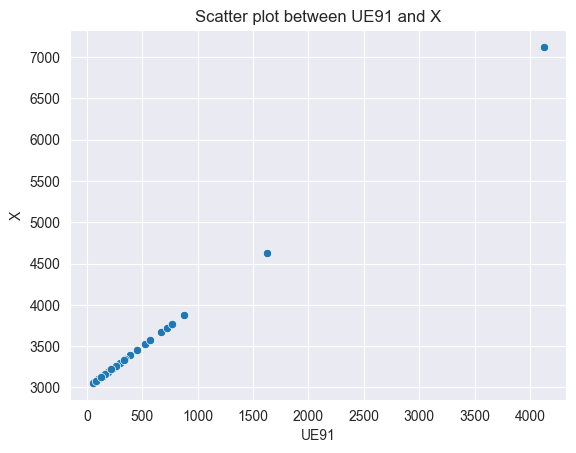

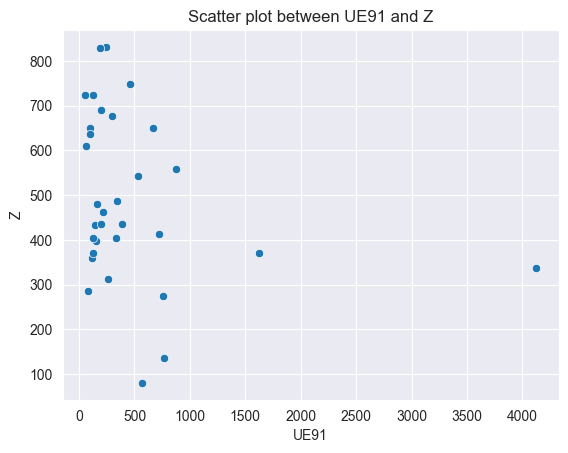

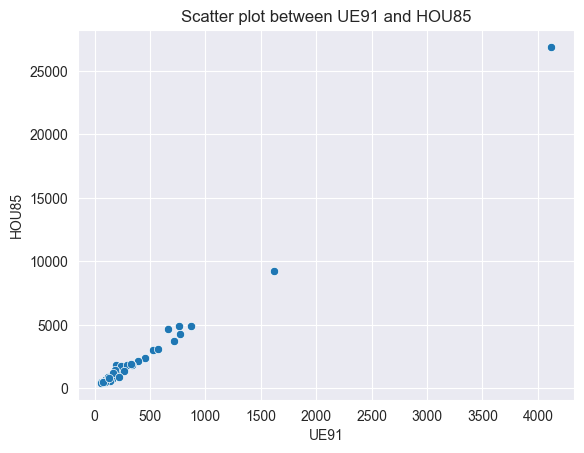

,UE91,X,Z,HOU85
count,32.000000,32.000000,32.000000,32.000000
mean,471.812500,3471.812500,491.971300,2867.281250
std,743.402918,743.402918,188.083913,4772.348649
min,54.000000,3054.000000,80.211634,435.000000
25%,128.750000,3128.750000,370.549809,713.250000
50%,229.000000,3229.000000,448.660100,1628.000000
75%,538.000000,3538.000000,649.853384,3044.000000
max,4123.000000,7123.000000,830.889512,26881.000000


In [44]:
## Scatter plots
sns.scatterplot(data=province91, x="UE91", y="X")
plt.xlabel("UE91")
plt.ylabel("X")
plt.title("Scatter plot between UE91 and X")
plt.show()

sns.scatterplot(data=province91, x="UE91", y="Z")
plt.xlabel("UE91")
plt.ylabel("Z")
plt.title("Scatter plot between UE91 and Z")
plt.show()

sns.scatterplot(data=province91, x="UE91", y="HOU85")
plt.xlabel("UE91")
plt.ylabel("HOU85")
plt.title("Scatter plot between UE91 and HOU85")
plt.show()

## Descriptive statistics
UE91_stats = province91["UE91"].describe()
X_stats = province91["X"].describe()
Z_stats = province91["Z"].describe()
HOU85_stats = province91["HOU85"].describe()

# Combining the statistics
combined_stats = pd.concat([UE91_stats, X_stats, Z_stats, HOU85_stats], axis=1)
combined_stats.columns = ["UE91", "X", "Z", "HOU85"]
display(combined_stats)

- Examine the relation of study variable and the auxiliary variable, i.e. fit regression models and comment the results.
When doing multiple linear regression, it appears that X's perfect correlation causes the model to consider it to be far and away the biggest determinant of UE91. This does show the danger of a model inserting a same or functionally same value as the key.

- View Monte Carlo examples from VLISS Training Key 54 B.
HOU85 being so tight is interesting, as the standard deviation from my descriptive statistics (4772) is much higher then the mean (2867) so I'd expect a wider distribution. Z and X are more expected, with X being relatively centered and Z being more random.

In [45]:
## Multiple Linear Regression
X = province91[["X", "Z", "HOU85"]]
# Constant for intercept
X = sm.add_constant(X)
y = province91["UE91"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   UE91   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.843e+30
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:07:45   Log-Likelihood:                 843.82
No. Observations:                  32   AIC:                            -1680.
Df Residuals:                      28   BIC:                            -1674.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3000.0000   9.21e-12  -3.26e+14      0.0